In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output {font-size:19pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

# 1. tensorflow v2.xx에서 v1 사용하기

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2비활성화하고 v1을 활성화

## Tensorflow
- 그래프 정의 (tensor객체의 흐름)
- sess = tf.Session()을 실행
- sess.run()을 통해 변수값을 확인할 수 있음

In [7]:
# tensor = data(상수,변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [8]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10, dtype=tf.float16)
node2 = tf.constant(20, dtype=tf.float16)
node3 = tf.add(node1, node2)
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [9]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1,2,3]),  dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
sess.run([node1, node2])

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]

In [11]:
# 평균값 계산 : tf.reduce_mean()
data = np.array([1., 2., 3., 4.])
m = tf.reduce_mean(data)
sess = tf.Session()
sess.run(m)

2.5

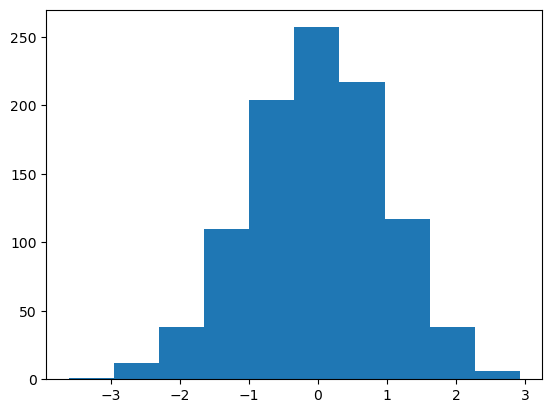

In [21]:
# tf.random_normal([size]) : 평균0이고, 표준편차가 1인 난수 size 개 발생. 난수갯수:독립변수갯수
import matplotlib.pyplot as plt
tensor = tf.random_normal([1000]) # 평균0, 표준편차가 1인 난수 2(정규분포 난수)
sess = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2. tensorflow v1을 이용한  linear regression을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [35]:
# tensor 그래프(객체 흐름) 정의
#data set(x, y)
x = np.array([1,2,3])
y = np.array([1,2,3])
# weight와 bias (처음에는 랜덤값으로 셋팅했다가, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis : 결과는 넘파이 배열
H = W*x + b
# cost function (손실함수 = mse : 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))
'''
학습 목적 : cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선위 미분값이 줄어드는 방향으로 학습(경사하강법)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#Session 생성
sess = tf.Session()
# tf.Variable 변수 노드(W, b) 초기화
sess.run(tf.global_variables_initializer())
# 6000번 학습 (v2에서의 fit함수)
for step in range(6001):
    _, cost_val, W_val, b_val =sess.run([train, cost, W, b])
    if step%300 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, 
                                            cost_val,
                                            W_val,
                                            b_val))

0번째 cost:0.9739561080932617, W:[0.81470054], b:[-0.60462695]
300번째 cost:0.006502692122012377, W:[1.0936575], b:[-0.21290551]
600번째 cost:0.0015343638369813561, W:[1.0454946], b:[-0.10342002]
900번째 cost:0.00036204769276082516, W:[1.0220994], b:[-0.05023702]
1200번째 cost:8.54278914630413e-05, W:[1.0107348], b:[-0.02440285]
1500번째 cost:2.0158335246378556e-05, W:[1.0052147], b:[-0.01185405]
1800번째 cost:4.756914677273016e-06, W:[1.0025332], b:[-0.00575839]
2100번째 cost:1.1229629990339163e-06, W:[1.0012308], b:[-0.00279771]
2400번째 cost:2.6545777132014337e-07, W:[1.0005988], b:[-0.00136024]
2700번째 cost:6.296439636344076e-08, W:[1.0002917], b:[-0.00066249]
3000번째 cost:1.4996633268538062e-08, W:[1.0001423], b:[-0.00032328]
3300번째 cost:3.5581297908038323e-09, W:[1.0000694], b:[-0.00015744]
3600번째 cost:8.453640010230856e-10, W:[1.0000336], b:[-7.6823686e-05]
3900번째 cost:2.0402980693834394e-10, W:[1.0000167], b:[-3.7661277e-05]
4200번째 cost:6.361376703178934e-11, W:[1.0000095], b:[-2.0799982e-05]
4500

In [36]:
# 최종적으로 나온 회귀식 : H = W*x + b
sess.run([W, b])

[array([1.0000044], dtype=float32), array([-8.861246e-06], dtype=float32)]

In [38]:
W_, b_ = sess.run([W, b])
W_, b_

(array([1.0000044], dtype=float32), array([-8.861246e-06], dtype=float32))

In [39]:
print('최종 회귀식 : H = {}*x + {}'.format(W_[0], b_[0]))

최종 회귀식 : H = 1.0000044107437134*x + -8.861245987645816e-06


In [40]:
def to_predict(x):
    return W_[0]*x + b_[0]

In [41]:
to_predict(3)

3.0000043709851525

## 2.2 predict을 하기 위한 placeholder 이용
- placeholder : 외부에서 데이터를 입력받을 수 있는 노드

In [45]:
a = tf.placeholder(tf.float16)
b = tf.placeholder(tf.float16)
ab = tf.add(a, b)
sess = tf.Session()
sess.run([a, b, ab], feed_dict={a : 10,
                                b : 20})

[array(10., dtype=float16), array(20., dtype=float16), 30.0]

In [47]:
sess.run(ab, feed_dict={a:np.array([1,2,3]),
                        b:np.array([1,2,3]) })

array([2., 4., 6.], dtype=float16)